### Setup

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
def find_movie_title(id):
    row = movies.loc[movies['movieId'] == id]
    return row['title']

In [128]:
data_path = '../raw_data/ml-25m/'
movies = pd.read_csv(data_path + 'movies.csv')
ratings = pd.read_csv(data_path + 'ratings.csv')

In [129]:
ratings = ratings.merge(movies[['movieId', 'title']], on='movieId')

In [130]:
ratings

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,3,296,5.0,1439474476,Pulp Fiction (1994)
2,4,296,4.0,1573938898,Pulp Fiction (1994)
3,5,296,4.0,830786155,Pulp Fiction (1994)
4,7,296,4.0,835444730,Pulp Fiction (1994)
...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004)
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995)
25000093,162386,200726,4.0,1554651417,The Graduates (1995)


In [131]:
ratings.userId.nunique()

162541

In [132]:
ratings.movieId.nunique()

59047

In [133]:
possible_rates = ratings.rating.unique()
np.sort(possible_rates, axis=0)

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [134]:
ratings.movieId.value_counts().head(10)

356     81491
318     81482
296     79672
593     74127
2571    72674
260     68717
480     64144
527     60411
110     59184
2959    58773
Name: movieId, dtype: int64

In [135]:
def get_most_rated_movies_df(ratings_df, top_number):
    most_rated_movies = ratings_df.movieId.value_counts().head(top_number).index
    return ratings_df[ratings_df.movieId.isin(most_rated_movies)].copy()

In [136]:
ratings_top = get_most_rated_movies_df(ratings, 50)
ratings_top

,userId,movieId,rating,timestamp,title
0,1,296,5.0,1147880044,Pulp Fiction (1994)
1,3,296,5.0,1439474476,Pulp Fiction (1994)
2,4,296,4.0,1573938898,Pulp Fiction (1994)
3,5,296,4.0,830786155,Pulp Fiction (1994)
4,7,296,4.0,835444730,Pulp Fiction (1994)
...,...,...,...,...,...
12008057,162533,1721,2.5,1281406171,Titanic (1997)
12008058,162534,1721,3.5,1526713829,Titanic (1997)
12008059,162538,1721,4.0,1438781404,Titanic (1997)
12008060,162539,1721,5.0,995149720,Titanic (1997)


In [137]:
rates_per_user = ratings_top.userId.value_counts()
rates_per_user

58402     50
22386     50
10361     50
112101    50
30112     50
          ..
84339      1
106770     1
122676     1
80340      1
88727      1
Name: userId, Length: 157481, dtype: int64

In [138]:
cumulative_rates_per_user = rates_per_user.cumsum()
cumulative_rates_per_user

58402          50
22386         100
10361         150
112101        200
30112         250
           ...   
84339     2544545
106770    2544546
122676    2544547
80340     2544548
88727     2544549
Name: userId, Length: 157481, dtype: int64

<AxesSubplot:ylabel='userId'>

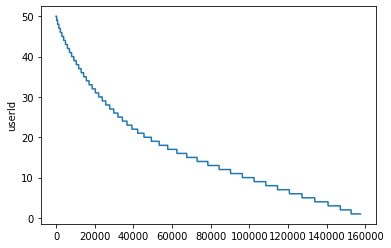

In [139]:
x_axis = list(range(1,len(rates_per_user)+1))
sns.lineplot(x=x_axis, y=rates_per_user)

<AxesSubplot:ylabel='userId'>

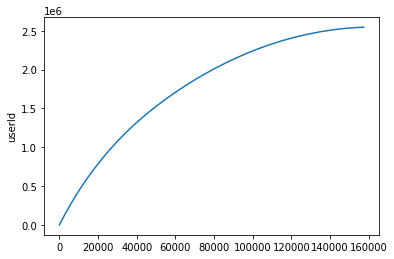

In [140]:
sns.lineplot(x=x_axis, y=cumulative_rates_per_user)

In [141]:
def get_users_with_min_num_of_ratings_df(ratings_df, min_num_of_ratings):
    rates_per_user = ratings_df.userId.value_counts()
    bolean_users_with_min_num_of_ratings = ratings_df.userId.value_counts() >= min_num_of_ratings
    users_with_min_num_of_ratings = rates_per_user[bolean_users_with_min_num_of_ratings].index
    return ratings_df[ratings_df.userId.isin(users_with_min_num_of_ratings)].copy()

In [142]:
def get_users_with_num_of_ratings_df(ratings_df, num_of_ratings):
    rates_per_user = ratings_df.userId.value_counts()
    bolean_users_with_num_of_ratings = ratings_df.userId.value_counts() == num_of_ratings
    users_with_num_of_ratings = rates_per_user[bolean_users_with_num_of_ratings].index
    return ratings_df[ratings_df.userId.isin(users_with_num_of_ratings)].copy()

In [143]:
ratings_top_users_top = get_users_with_num_of_ratings_df(ratings_top, 20)
ratings_top_users_top

,userId,movieId,rating,timestamp,title
6,10,296,4.5,1227571308,Pulp Fiction (1994)
30,62,296,4.5,1148504842,Pulp Fiction (1994)
40,82,296,2.5,1437237189,Pulp Fiction (1994)
47,101,296,3.5,1457357502,Pulp Fiction (1994)
76,158,296,5.0,835484979,Pulp Fiction (1994)
...,...,...,...,...,...
12007931,162052,1721,4.0,1451167846,Titanic (1997)
12007944,162119,1721,4.0,997307617,Titanic (1997)
12007982,162269,1721,4.5,1105577406,Titanic (1997)
12008003,162347,1721,3.5,1237072843,Titanic (1997)


In [144]:
df = ratings_top_users_top.pivot(index='userId', columns='title', values='rating')
df

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
10,NaN,3.0,NaN,4.0,NaN,3.0,4.0,NaN,NaN,3.5,...,5.0,5.0,5.0,4.0,NaN,NaN,3.5,3.5,4.0,5.0
62,NaN,NaN,5.0,NaN,NaN,NaN,4.5,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5
64,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,NaN,...,5.0,5.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
82,NaN,NaN,3.5,NaN,NaN,NaN,3.5,NaN,NaN,3.5,...,NaN,NaN,NaN,1.5,NaN,NaN,4.0,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,...,5.0,5.0,NaN,4.0,5.0,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162344,NaN,3.5,NaN,3.5,4.0,4.0,3.5,NaN,NaN,NaN,...,NaN,NaN,4.0,4.5,NaN,NaN,3.5,3.0,NaN,NaN
162347,4.0,3.5,NaN,NaN,NaN,NaN,5.0,NaN,4.5,NaN,...,4.5,4.5,NaN,NaN,4.5,3.5,NaN,NaN,5.0,NaN
162418,4.0,4.0,NaN,2.0,NaN,3.0,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,4.0,4.0,NaN,4.0


In [384]:
df.to_csv('../raw_data/streamlit-data/ratings_top_users_top.csv', columns=df.columns, index=True)

### Item Based colaborative filter

In [145]:
def standardize(series):
    new_series = (series - series.mean(skipna=True))
    return new_series

In [146]:
ratings_std_by_column = df.apply(standardize, axis=0)
ratings_std_by_column

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
10,NaN,-0.72974,NaN,0.094251,NaN,-0.415658,-0.060203,NaN,NaN,-0.643586,...,0.889487,0.839563,0.915541,0.052826,NaN,NaN,-0.425573,-0.007004,0.082206,0.675461
62,NaN,NaN,0.896652,NaN,NaN,NaN,0.439797,NaN,-0.243612,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175461
64,NaN,NaN,NaN,NaN,-0.99962,NaN,NaN,NaN,0.756388,NaN,...,0.889487,0.839563,0.915541,NaN,NaN,NaN,0.074427,NaN,NaN,NaN
82,NaN,NaN,-0.603348,NaN,NaN,NaN,-0.560203,NaN,NaN,-0.643586,...,NaN,NaN,NaN,-2.447174,NaN,NaN,0.074427,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,0.00038,NaN,0.939797,NaN,NaN,NaN,...,0.889487,0.839563,NaN,0.052826,1.136739,NaN,NaN,NaN,NaN,0.675461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162344,NaN,-0.22974,NaN,-0.405749,0.00038,0.584342,-0.560203,NaN,NaN,NaN,...,NaN,NaN,-0.084459,0.552826,NaN,NaN,-0.425573,-0.507004,NaN,NaN
162347,1.018485,-0.22974,NaN,NaN,NaN,NaN,0.939797,NaN,0.256388,NaN,...,0.389487,0.339563,NaN,NaN,0.636739,0.034884,NaN,NaN,1.082206,NaN
162418,1.018485,0.27026,NaN,-1.905749,NaN,-0.415658,-1.060203,0.241923,NaN,NaN,...,NaN,NaN,NaN,-0.947174,NaN,NaN,0.074427,0.492996,NaN,-0.324539


In [147]:
ratings_std_by_col_fill = ratings_std_by_column.fillna(0)

#### Cossine similarity

In [148]:
from sklearn.metrics.pairwise import cosine_similarity

In [149]:
item_similarity = cosine_similarity(ratings_std_by_col_fill.T)
item_similarity.shape

(50, 50)

In [150]:
item_similarity_df = pd.DataFrame(item_similarity, index=df.columns, columns=df.columns)
item_similarity_df

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
title,,,,,,,,,,,,,,,,,,,,,
Ace Ventura: Pet Detective (1994),1.000000,0.116212,0.012193,0.064125,0.050599,0.131527,0.079298,0.024983,0.002046,0.019561,...,0.058148,0.053675,0.043980,0.113959,0.057208,0.046224,0.053732,0.137449,0.029842,0.025128
Aladdin (1992),0.116212,1.000000,0.034350,0.141088,0.069323,0.130581,0.066440,0.155231,0.031202,0.011678,...,0.066160,0.062698,0.088811,0.104726,0.045244,0.068106,0.169328,0.130402,-0.008862,0.014891
American Beauty (1999),0.012193,0.034350,1.000000,0.018778,0.059325,0.023269,0.077730,0.037803,0.121898,0.145214,...,0.061450,0.058508,0.046194,0.046681,0.042983,0.002124,0.028265,0.026050,0.061143,0.092038
Apollo 13 (1995),0.064125,0.141088,0.018778,1.000000,0.050388,0.096719,0.143006,0.189605,0.020691,-0.005713,...,0.063588,0.042148,0.054640,0.062663,0.032491,0.073580,0.133036,0.178448,0.032323,0.040091
Back to the Future (1985),0.050599,0.069323,0.059325,0.050388,1.000000,0.045063,0.070328,0.020929,0.054152,0.023909,...,0.152424,0.164346,0.146357,0.129698,0.142090,0.078346,0.155755,0.054546,0.055470,0.030698
Batman (1989),0.131527,0.130581,0.023269,0.096719,0.045063,1.000000,0.063095,0.061941,-0.000593,0.033688,...,0.076060,0.055388,0.088505,0.134595,0.051182,0.005055,0.091675,0.163999,0.059020,0.070172
Braveheart (1995),0.079298,0.066440,0.077730,0.143006,0.070328,0.063095,1.000000,0.193359,0.101349,0.028026,...,0.115135,0.089090,0.084411,0.142567,0.080164,0.092663,0.119902,0.105435,0.087599,0.075291
Dances with Wolves (1990),0.024983,0.155231,0.037803,0.189605,0.020929,0.061941,0.193359,1.000000,-0.008163,0.041941,...,0.055980,0.030124,0.024453,0.090401,0.049358,0.066102,0.101077,0.100686,0.012163,0.047036
"Dark Knight, The (2008)",0.002046,0.031202,0.121898,0.020691,0.054152,-0.000593,0.101349,-0.008163,1.000000,0.031951,...,0.111334,0.113857,0.055674,0.094985,0.028254,0.024217,0.079221,0.021829,0.042864,0.073034


In [151]:
def get_similar_movies(movie_name,user_rating):
    similar_score = item_similarity_df[movie_name]*(user_rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    
    
    return similar_score

print(get_similar_movies("Seven (a.k.a. Se7en) (1995)",5))

title
Seven (a.k.a. Se7en) (1995)                                                       2.500000
Usual Suspects, The (1995)                                                        0.425514
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                                         0.418874
Pulp Fiction (1994)                                                               0.359714
Silence of the Lambs, The (1991)                                                  0.343813
Shawshank Redemption, The (1994)                                                  0.327777
Braveheart (1995)                                                                 0.289547
Fight Club (1999)                                                                 0.284705
Forrest Gump (1994)                                                               0.261974
Ace Ventura: Pet Detective (1994)                                                 0.239961
Batman (1989)                                                                     0.

In [152]:
movies_ratings = [("Ace Ventura: Pet Detective (1994)",5),("Gladiator (2000)",1),("Jurassic Park (1993)",1),("Lord of the Rings: The Return of the King, The (2003)",5)]

similar_movies = pd.DataFrame()

for movie,rating in movies_ratings:
    similar_movies = similar_movies.append(get_similar_movies(movie,rating),ignore_index=True)
    
similar_movies.head()
# similar_movies.sum().sort_values(ascending=False)


,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
0,2.500000,0.290531,0.030484,0.160313,0.126498,0.328817,0.198245,0.062457,0.005115,0.048902,...,0.145369,0.134189,0.109950,0.284896,0.143020,0.115561,0.134331,0.343622,0.074605,0.062820
1,-0.040850,-0.064618,-0.104055,-0.069711,-0.089766,0.003875,-0.221586,-0.070979,-0.257288,-0.083700,...,-0.153353,-0.105694,-0.142244,-0.092794,-0.086900,-0.143636,-0.050334,-0.059143,-0.029712,-0.121528
2,-0.192086,-0.243367,-0.054813,-0.292362,-0.196510,-0.209701,-0.269471,-0.262316,-0.093963,-0.040311,...,-0.298705,-0.221053,-0.234770,-0.327465,-0.142290,-0.142834,-0.284942,-0.303466,-0.053773,-0.071307
3,0.031120,0.076634,0.147404,0.118469,0.148116,0.005059,0.211849,0.036550,0.372530,0.077602,...,0.527801,0.456603,0.401415,0.132674,0.162543,0.197027,0.198924,0.048539,0.056039,0.178468


### User Based colaborative filter

In [153]:
ratings_std_by_row = df.apply(standardize, axis=1)
ratings_std_by_row

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
10,NaN,-1.050,NaN,-0.05,NaN,-1.05,-0.050,NaN,NaN,-0.550,...,0.950,0.950,0.95,-0.050,NaN,NaN,-0.550,-0.55,-0.050,0.95
62,NaN,NaN,0.550,NaN,NaN,NaN,0.050,NaN,-0.450,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05
64,NaN,NaN,NaN,NaN,-1.65,NaN,NaN,NaN,0.350,NaN,...,0.350,0.350,0.35,NaN,NaN,NaN,-0.650,NaN,NaN,NaN
82,NaN,NaN,0.525,NaN,NaN,NaN,0.525,NaN,NaN,0.525,...,NaN,NaN,NaN,-1.475,NaN,NaN,1.025,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,-0.60,NaN,0.400,NaN,NaN,NaN,...,0.400,0.400,NaN,-0.600,0.400,NaN,NaN,NaN,NaN,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162344,NaN,-0.400,NaN,-0.40,0.10,0.10,-0.400,NaN,NaN,NaN,...,NaN,NaN,0.10,0.600,NaN,NaN,-0.400,-0.90,NaN,NaN
162347,-0.275,-0.775,NaN,NaN,NaN,NaN,0.725,NaN,0.225,NaN,...,0.225,0.225,NaN,NaN,0.225,-0.775,NaN,NaN,0.725,NaN
162418,0.100,0.100,NaN,-1.90,NaN,-0.90,-0.900,0.1,NaN,NaN,...,NaN,NaN,NaN,-0.900,NaN,NaN,0.100,0.10,NaN,0.10


In [213]:
def make_user_ratings(movie_titles, ratings, df, zeros=True, std=True):
    number_of_movies = df.shape[1]
    if std:
        ratings_ = ratings - np.mean(ratings)
    else:
        ratings_ = ratings
    if zeros:
        new_user = pd.DataFrame([np.zeros(number_of_movies)], columns=df.columns)
    else:
        new_user = pd.DataFrame(np.nan, index=[0], columns=ratings_std_by_row_fill.columns)
    for movie_title, rating in zip(movie_titles, ratings_):
        new_user[movie_title] = rating
    return new_user

In [232]:
user_rated_movies = [
        'Batman (1989)',
        'Memento (2000)',
        'Matrix, The (1999)',
        'Titanic (1997)',
        'Inception (2010)',
        'American Beauty (1999)',
        'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
        'Lord of the Rings: The Fellowship of the Ring, The (2001)',
        'Monty Python and the Holy Grail (1975)'
    ]

user_ratings = [1,4,3,1,4,1,1,5,1]

user_ratings_df = make_user_ratings(
    user_rated_movies,
    user_ratings,
    ratings_std_by_row_fill
)
user_ratings_df

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
0,0.0,0.0,-1.333333,0.0,0.0,-1.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,-1.333333,0.0


#### Cossine similarity

In [233]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarities = cosine_similarity(ratings_std_by_row_fill, user_ratings_df)
user_similarities.shape

(3796, 1)

In [234]:
user_similarities_df = pd.DataFrame(user_similarities, index = ratings_std_by_row_fill.index, columns=['similarity'])
user_similarities_df

,similarity
userId,
10,0.104522
62,-0.254467
64,0.078432
82,-0.215229
92,-0.092533
...,...
162344,-0.011804
162347,-0.056978
162418,0.054795


In [235]:
def get_similar_users(user_similarities_df, number_of_similar_users):
    return user_similarities_df.sort_values(by='similarity', ascending=False).head(number_of_similar_users).index
    
similar_users = get_similar_users(user_similarities_df, 10)
similar_users

Int64Index([20181, 144820, 148670, 52315, 147539, 78608, 81163, 60705, 826,
            37816],
           dtype='int64', name='userId')

In [249]:
def get_movies_not_seen(users_movies_ratings, similar_users, user_rated_movies):
#     return users_movies_ratings.loc[similar_users].drop(columns=user_rated_movies)
        return users_movies_ratings.loc[similar_users]

movies_not_seen = get_movies_not_seen(ratings_std_by_row, similar_users, user_rated_movies)
movies_not_seen

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
20181,NaN,NaN,-0.700,NaN,NaN,NaN,-0.200,NaN,-0.200,-0.700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.200
144820,NaN,NaN,NaN,NaN,-0.575,NaN,-0.075,NaN,NaN,0.925,...,NaN,NaN,NaN,NaN,NaN,-1.075,NaN,NaN,NaN,NaN
148670,NaN,NaN,-0.800,NaN,0.700,NaN,0.700,NaN,0.700,NaN,...,0.700,0.200,-0.300,NaN,NaN,-1.800,-0.8,NaN,-0.30,NaN
52315,NaN,NaN,-1.325,NaN,0.175,NaN,-0.325,NaN,NaN,NaN,...,-0.325,0.175,NaN,-0.325,-0.825,NaN,NaN,NaN,NaN,0.675
147539,NaN,NaN,-0.275,NaN,NaN,NaN,NaN,NaN,-0.775,0.725,...,NaN,NaN,NaN,NaN,NaN,-2.775,NaN,NaN,NaN,0.225
78608,NaN,NaN,0.025,NaN,-0.475,-0.475,NaN,NaN,0.525,NaN,...,0.525,0.525,0.525,-0.475,-0.475,-0.975,NaN,NaN,NaN,NaN
81163,NaN,NaN,NaN,NaN,NaN,NaN,-0.600,NaN,NaN,NaN,...,-0.600,-0.600,-0.600,NaN,NaN,NaN,-0.1,NaN,-0.60,NaN
60705,NaN,NaN,-0.325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.175,0.175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.175
826,NaN,-0.125,NaN,NaN,-0.625,NaN,NaN,NaN,0.375,NaN,...,-0.125,-0.125,-0.125,NaN,NaN,-0.125,NaN,NaN,NaN,NaN


In [250]:
def get_recommended_movies(movies_not_seen_df):
    return movies_not_seen_df.mean(axis=0, skipna=True).sort_values(ascending=False)

get_recommended_movies(movies_not_seen)

title
Lord of the Rings: The Fellowship of the Ring, The (2001)                         0.669444
Inception (2010)                                                                  0.567857
Memento (2000)                                                                    0.478125
Lord of the Rings: The Return of the King, The (2003)                             0.450000
Princess Bride, The (1987)                                                        0.425000
Matrix, The (1999)                                                                0.393750
Gladiator (2000)                                                                  0.383333
Fargo (1996)                                                                      0.350000
Lord of the Rings: The Two Towers, The (2002)                                     0.336111
Godfather, The (1972)                                                             0.275000
Usual Suspects, The (1995)                                                        0.

#### Person similarity

In [251]:
pearson_user_ratings_df_std = make_user_ratings(
    user_rated_movies,
    user_ratings,
    ratings_std_by_row,
    zeros=False,
    std=True
)

pearson_user_ratings_df = make_user_ratings(
    user_rated_movies,
    user_ratings,
    ratings_std_by_row,
    zeros=False,
    std=False
)
pearson_user_ratings_df_std

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
0,NaN,NaN,-1.333333,NaN,NaN,-1.333333,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1.333333,NaN,NaN,-1.333333,NaN


In [385]:
user_pearson_similarities_std = ratings_std_by_row.corrwith(pearson_user_ratings_df_std.iloc[0], axis=1, drop=False, method='pearson')
print(user_pearson_similarities_std)
user_pearson_similarities = df.corrwith(pearson_user_ratings_df.iloc[0], axis=1, drop=False, method='pearson')
print(user_pearson_similarities)

/Users/Quim/.pyenv/versions/3.7.7/envs/rogue/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/Quim/.pyenv/versions/3.7.7/envs/rogue/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


userId
10             NaN
62       -0.801784
64        0.361158
82       -0.427618
92        1.000000
            ...   
162344         NaN
162347   -0.134840
162418         NaN
162426    0.818182
162532         NaN
Length: 3796, dtype: float64
userId
10             NaN
62       -0.801784
64        0.361158
82       -0.427618
92        1.000000
            ...   
162344         NaN
162347   -0.134840
162418         NaN
162426    0.818182
162532         NaN
Length: 3796, dtype: float64


In [253]:
user_pearson_similarities_df = pd.DataFrame(user_pearson_similarities, index = df.index, columns=['similarity'])
user_pearson_similarities_df

,similarity
userId,
10,NaN
62,-0.801784
64,0.361158
82,-0.427618
92,1.000000
...,...
162344,NaN
162347,-0.134840
162418,NaN


In [254]:
pearson_similar_users = get_similar_users(user_pearson_similarities_df, 10)
pearson_similar_users

Int64Index([19218, 55096, 145268, 15610, 1891, 43594, 129395, 134495, 34567,
            2620],
           dtype='int64', name='userId')

In [255]:
pearson_movies_not_seen = get_movies_not_seen(df, pearson_similar_users, user_rated_movies)
pearson_movies_not_seen

title,Ace Ventura: Pet Detective (1994),Aladdin (1992),American Beauty (1999),Apollo 13 (1995),Back to the Future (1985),Batman (1989),Braveheart (1995),Dances with Wolves (1990),"Dark Knight, The (2008)",Fargo (1996),...,Star Wars: Episode IV - A New Hope (1977),Star Wars: Episode V - The Empire Strikes Back (1980),Star Wars: Episode VI - Return of the Jedi (1983),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),True Lies (1994),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),"Usual Suspects, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
19218,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,4.5,...,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.5
55096,NaN,4.0,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,...,4.0,4.0,3.0,4.0,NaN,NaN,4.0,NaN,NaN,NaN
145268,NaN,NaN,3.5,3.0,NaN,3.5,NaN,NaN,NaN,4.0,...,4.0,4.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,3.5
15610,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,5.0,5.0,NaN,3.0,5.0,NaN,NaN,NaN,NaN,NaN
1891,NaN,4.5,4.0,5.0,4.5,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4.5,NaN,NaN,5.0,4.0,NaN,3.5
43594,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,3.0,4.0,...,2.0,2.0,NaN,NaN,NaN,NaN,4.0,3.0,NaN,5.0
129395,5.0,NaN,NaN,NaN,3.5,NaN,4.0,NaN,NaN,NaN,...,4.0,4.0,4.0,NaN,NaN,NaN,4.0,NaN,2.0,NaN
134495,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.5,NaN,NaN,4.5,0.5,NaN,4.5
34567,NaN,NaN,NaN,NaN,4.5,NaN,4.5,NaN,NaN,4.0,...,3.0,NaN,4.0,NaN,5.0,NaN,5.0,NaN,3.5,NaN


In [390]:
pd.DataFrame(get_recommended_movies(pearson_movies_not_seen), columns=['Rating'])

,Rating
title,
"Lord of the Rings: The Two Towers, The (2002)",5.000000
"Terminator, The (1984)",5.000000
Independence Day (a.k.a. ID4) (1996),5.000000
"Lord of the Rings: The Fellowship of the Ring, The (2001)",5.000000
Ace Ventura: Pet Detective (1994),5.000000
Gladiator (2000),4.750000
Inception (2010),4.750000
"Shawshank Redemption, The (1994)",4.625000
Memento (2000),4.625000


### Using Surprise

In [356]:
from surprise import Dataset, Reader, KNNWithMeans, SVD

In [334]:
user_rated_movies = [
        'Batman (1989)',
        'Memento (2000)',
        'Matrix, The (1999)',
        'Titanic (1997)',
        'Inception (2010)',
        'American Beauty (1999)',
        'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
        'Lord of the Rings: The Fellowship of the Ring, The (2001)',
        'Monty Python and the Holy Grail (1975)'
    ]

user_ratings = [1,4,3,1,4,1,1,5,1]
user_id = [0,0,0,0,0,0,0,0,0]
ratings_dict = {
    'title': user_rated_movies,
    'rating': user_ratings,
    'userId': user_id
}

user_surprise_ratings = pd.DataFrame(ratings_dict)
user_surprise_ratings

,title,rating,userId
0,Batman (1989),1,0
1,Memento (2000),4,0
2,"Matrix, The (1999)",3,0
3,Titanic (1997),1,0
4,Inception (2010),4,0
5,American Beauty (1999),1,0
6,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),1,0
7,"Lord of the Rings: The Fellowship of the Ring,...",5,0
8,Monty Python and the Holy Grail (1975),1,0


In [335]:
ratings_surprise_df = pd.concat([ratings_top_users_top, user_surprise_ratings])
ratings_surprise_df

,userId,movieId,rating,timestamp,title
6,10,296.0,4.5,1.227571e+09,Pulp Fiction (1994)
30,62,296.0,4.5,1.148505e+09,Pulp Fiction (1994)
40,82,296.0,2.5,1.437237e+09,Pulp Fiction (1994)
47,101,296.0,3.5,1.457358e+09,Pulp Fiction (1994)
76,158,296.0,5.0,8.354850e+08,Pulp Fiction (1994)
...,...,...,...,...,...
4,0,NaN,4.0,NaN,Inception (2010)
5,0,NaN,1.0,NaN,American Beauty (1999)
6,0,NaN,1.0,NaN,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
7,0,NaN,5.0,NaN,"Lord of the Rings: The Fellowship of the Ring,..."


In [336]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings_surprise_df[["userId", "title", "rating"]], reader)

In [363]:
sim_options = {
    "name": "pearson",
    "user_based": False,
}
algo = KNNWithMeans(sim_options=sim_options)

In [364]:
trainingSet = data.build_full_trainset()

algo.fit(trainingSet)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [365]:
def get_predicted_ratings_from_surprise(model, movies):
    return [(title, model.predict(0, title).est) for title in movies]

In [377]:
def get_recommended_movies_surprise(movie_list):
    movie_list.sort(key=lambda e: -e[1])
    return movie_list

In [382]:
prediction = get_predicted_ratings_from_surprise(algo, ratings_surprise_df.title.unique())
get_recommended_movies_surprise(prediction)[:15]

[('Lord of the Rings: The Return of the King, The (2003)', 3.5448872669982077),
 ('Lord of the Rings: The Fellowship of the Ring, The (2001)',
  3.4111803716176765),
 ('Lord of the Rings: The Two Towers, The (2002)', 3.343535158431419),
 ('Godfather, The (1972)', 3.093888143792542),
 ('Inception (2010)', 3.0836305222136122),
 ('Shawshank Redemption, The (1994)', 3.057803706810528),
 ('Matrix, The (1999)', 3.0414759167030727),
 ('Star Wars: Episode IV - A New Hope (1977)', 3.0021167777969513),
 ('Saving Private Ryan (1998)', 3.0006976183724547),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 2.9594922204464824),
 ('Dark Knight, The (2008)', 2.9571577362002563),
 ('Gladiator (2000)', 2.9559843543016653),
 ('Memento (2000)', 2.9079466059833967),
 ('Usual Suspects, The (1995)', 2.8994863031810434),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  2.8918900224685684)]

In [367]:
svd = SVD()

In [368]:
trainingSet_SVD = data.build_full_trainset()

svd.fit(trainingSet_SVD)

In [381]:
prediction_SVD = get_predicted_ratings_from_surprise(svd,ratings_surprise_df.title.unique())
get_recommended_movies_surprise(prediction_SVD)[:15]

[('Lord of the Rings: The Fellowship of the Ring, The (2001)',
  3.9958716838807353),
 ('Lord of the Rings: The Two Towers, The (2002)', 3.805716063370873),
 ('Lord of the Rings: The Return of the King, The (2003)', 3.8035850148099253),
 ('Star Wars: Episode VI - Return of the Jedi (1983)', 3.546842988339742),
 ('Star Wars: Episode V - The Empire Strikes Back (1980)', 3.5038495503008877),
 ('Usual Suspects, The (1995)', 3.489444883173148),
 ('Godfather, The (1972)', 3.4810112583667476),
 ('Star Wars: Episode IV - A New Hope (1977)', 3.476953649897537),
 ('Shawshank Redemption, The (1994)', 3.459249034881304),
 ('Saving Private Ryan (1998)', 3.415425324713419),
 ('Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
  3.354001275166321),
 ('Dark Knight, The (2008)', 3.33657923453613),
 ('Princess Bride, The (1987)', 3.307926801102759),
 ("Schindler's List (1993)", 3.2294917908356395),
 ('Matrix, The (1999)', 3.2097561449621352)]

In [ ]:
user_that_want_recommendation = 101

In [ ]:
def get_similar_users(user_similarity_df, user_id, number_of_similar_users):
    return user_similarity_df[user_id].copy().sort_values(ascending=False).head(number_of_similar_users)

get_similar_users(user_similarity_df, user_that_want_recommendation, 10)

In [ ]:
def get_movies_to_predict_rate():
    pass

def get_movies_already_watched_by_user(users_movies_df, user_id):
    return users_movies_df.loc[user_id,:].dropna().copy()
    

get_movies_already_watched_by_user(df, user_that_want_recommendation)

### Using KMeans to search for similaries clusters

In [ ]:
average_score_per_user = np.sort(ratings_std_filled.mean(axis=1),axis=0)
x_axis = list(range(1,ratings_std_filled.shape[0]+1))
sns.lineplot(x=x_axis, y=average_score_per_user)

In [ ]:
from sklearn.cluster import MiniBatchKMeans, KMeans

mbkm = KMeans(n_clusters=10)
mbkm.fit(ratings_std_filled)

In [ ]:
clusters = pd.Series(mbkm.labels_).value_counts()
clusters

In [ ]:
x_axis = list(range(1,len(clusters)+1))
sns.lineplot(x=x_axis, y=clusters)

In [ ]:
def make_user_ratings(movie_ids, ratings, df):
    number_of_movies = df.shape[1]
    new_user = pd.DataFrame([np.zeros(number_of_movies)], columns=df.columns).replace(0,3)
    for movie_id, rating in zip(movie_ids,ratings):
        new_user[movie_id] = rating
    new_user_std = new_user.apply(standardize, axis=1)
    return new_user_std

In [ ]:
import random

movie_names = list(df.columns)
new_user_ratings_2 = make_user_ratings(
    random.sample(movie_names, 20),
    [5 for i in range(20)],
    df
)

new_user_ratings_2

In [ ]:
mbkm.predict(new_user_ratings_2)

- How do you determine which users or items are similar to one another?
- Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?
- How do you measure the accuracy of the ratings you calculate?